In [109]:
import pandas as pd

df = pd.read_csv("merged_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 28 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   How old are you?                                                                                     36 non-null     int64  
 1   What is your level of education?                                                                     36 non-null     object 
 2   What is your major/field of study?                                                                   36 non-null     object 
 3   How often do you use the internet for academic or personal purposes?                                 36 non-null     int64  
 4   How would you rate your knowledge of cybersecurity threats?                                          36 non-null

In [110]:
rename_dict = {
    "How old are you?": "Age",
    "What is your level of education?": "Education level",
    "What is your major/field of study?": "Field of study",
    "How often do you use the internet for academic or personal purposes?": "Internet usage frequency",
    "How would you rate your knowledge of cybersecurity threats?": "Cybersecurity knowledge",
    "Have you ever received formal training or education on cybersecurity?": "Received cybersecurity training",
    "How often do you update your software and operating system?": "Update frequency",
    "Do you use different passwords for different accounts?": "Different passwords",
    "How frequently do you change your passwords?": "Password change frequency",
    "Do you use two-factor authentication (2FA) for your accounts?": "Use 2FA",
    "On a scale of 1 to 10, how confident are you in identifying online scams and fraudulent activities?": "Confidence score",
    "Verify website security": "Check website security",
    "Cybersecurity awareness in curriculum": "Curriculum awareness",
    "Self-education": "Self-educated",
    "How likely are you to report a cybersecurity issue if you notice one in your school or workplace?": "Likelihood to report",
    "What do you think is the biggest cybersecurity threat today?": "Perceived main threat",
    "What exactly?": "Threat detail",
    "Creation time": "Timestamp"
}

data = df.rename(columns=rename_dict)

In [111]:
col = "Internet usage frequency"

median = data[col].median()
q1 = data[col].quantile(0.25)
q3 = data[col].quantile(0.75)
iqr = q3 - q1

lower_bound = median - 1.5 * iqr
upper_bound = median + 1.5 * iqr

data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


col = "Password change frequency"

median = data[col].median()
q1 = data[col].quantile(0.25)
q3 = data[col].quantile(0.75)
iqr = q3 - q1

lower_bound = median - 3 * iqr
upper_bound = median + 3 * iqr

data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


col = "Likelihood to report"

median = data[col].median()
q1 = data[col].quantile(0.25)
q3 = data[col].quantile(0.75)
iqr = q3 - q1

lower_bound = median - 3 * iqr
upper_bound = median + 3 * iqr

data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


col = "Confidence score"

median = data[col].median()
q1 = data[col].quantile(0.25)
q3 = data[col].quantile(0.75)
iqr = q3 - q1

lower_bound = median - 3 * iqr
upper_bound = median + 3 * iqr

data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

col = "Age"

median = data[col].median()
q1 = data[col].quantile(0.25)
q3 = data[col].quantile(0.75)
iqr = q3 - q1

lower_bound = median - 3 * iqr
upper_bound = median + 3 * iqr

data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [112]:
data["Age"].value_counts(normalize=True).mul(100).round(2)

Age
18    21.21
19    21.21
17    12.12
23     6.06
21     6.06
24     6.06
22     6.06
16     6.06
20     6.06
26     3.03
15     3.03
13     3.03
Name: proportion, dtype: float64

In [113]:
data["Internet usage frequency"].value_counts(normalize=True).mul(100).round(2)

Internet usage frequency
8     24.24
6     15.15
12    15.15
5     12.12
1      6.06
10     6.06
16     3.03
7      3.03
3      3.03
14     3.03
9      3.03
15     3.03
2      3.03
Name: proportion, dtype: float64

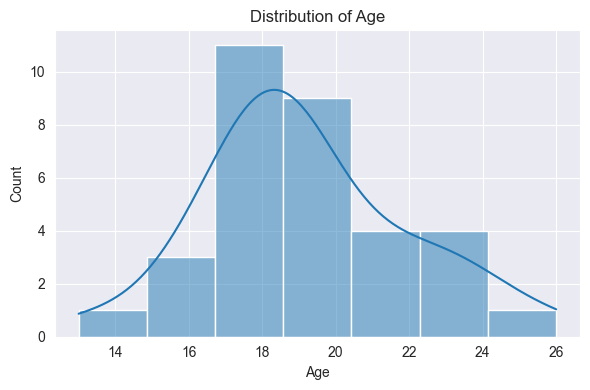

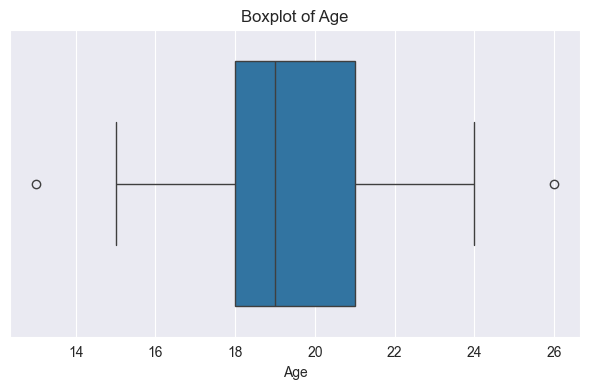

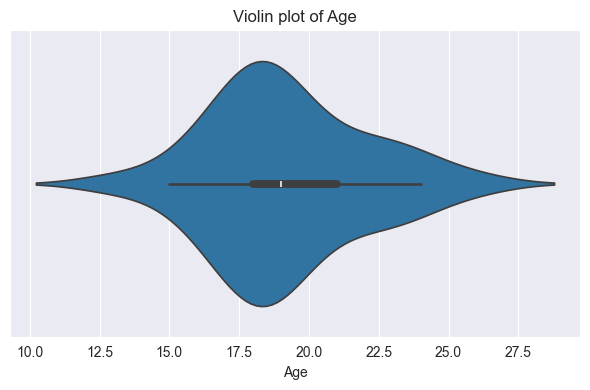

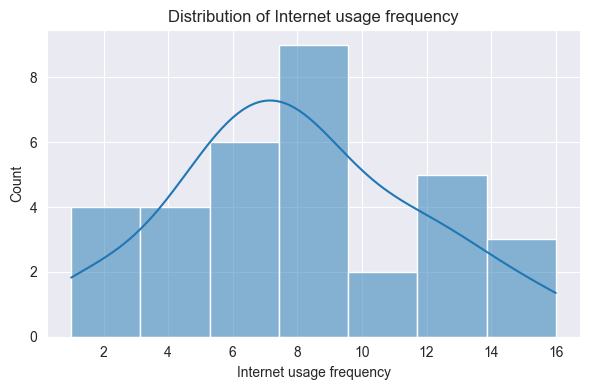

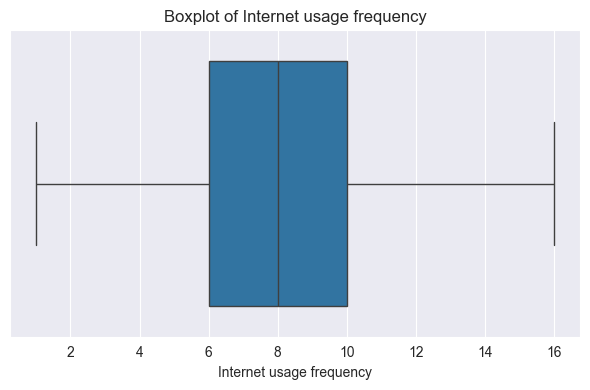

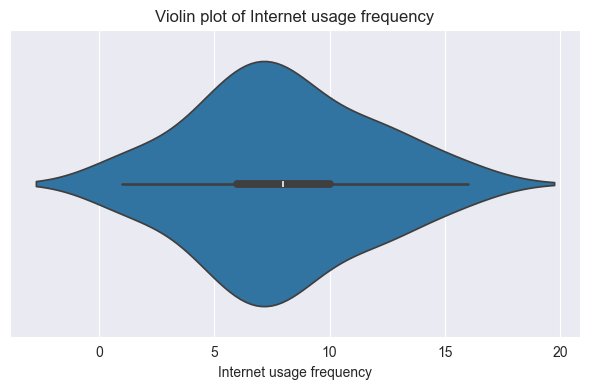

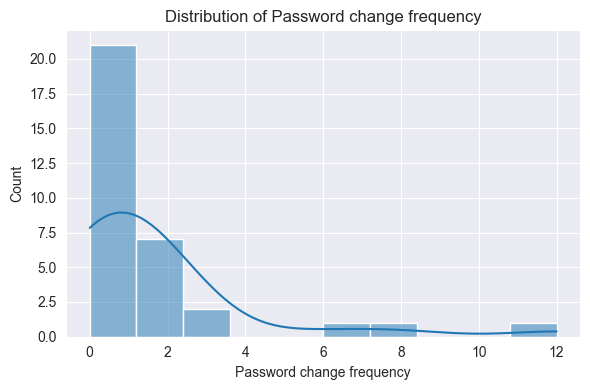

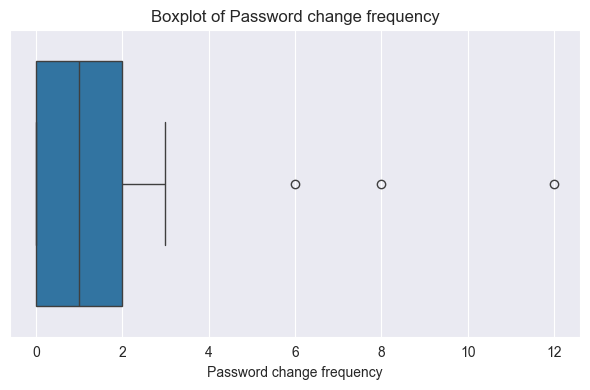

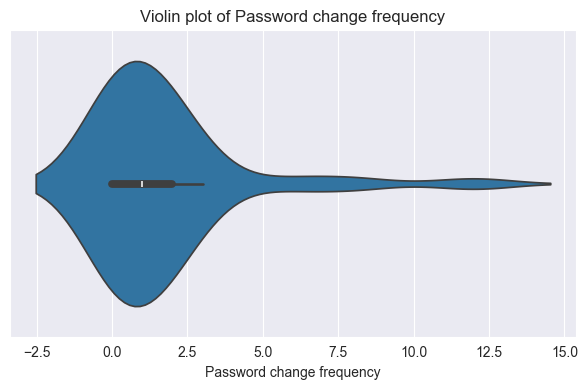

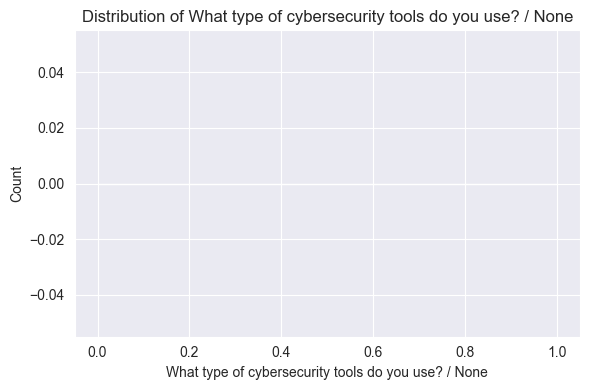

Skipped What type of cybersecurity tools do you use? / None: not enough variability for box/violin plot.


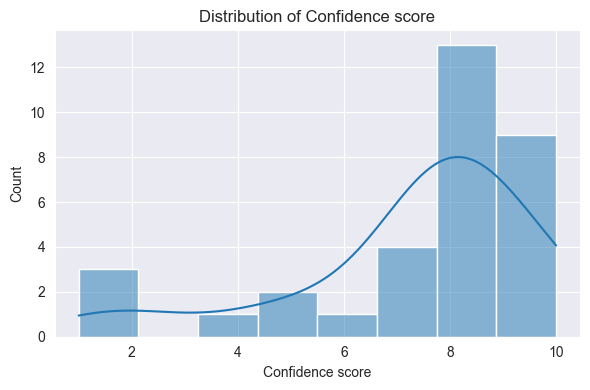

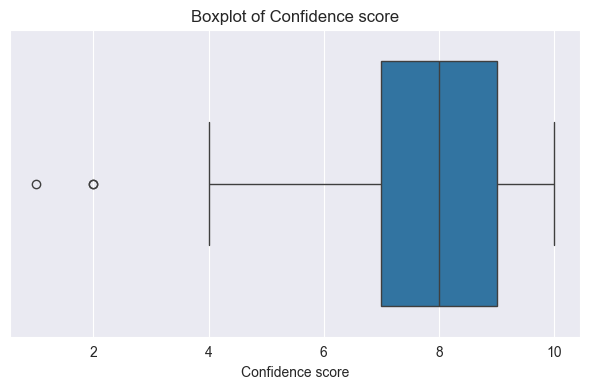

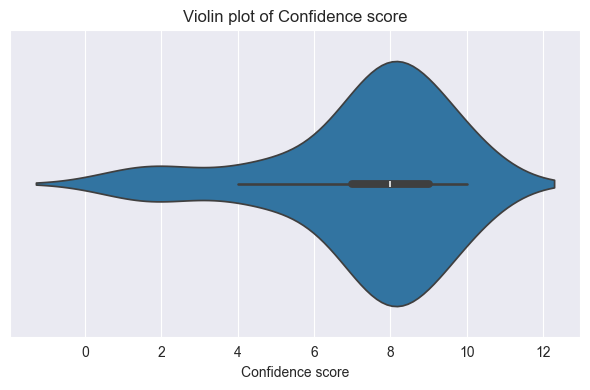

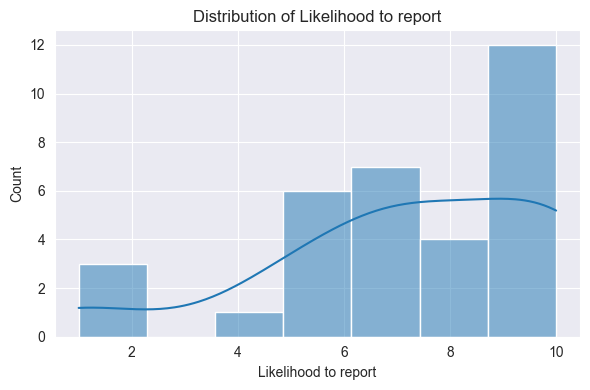

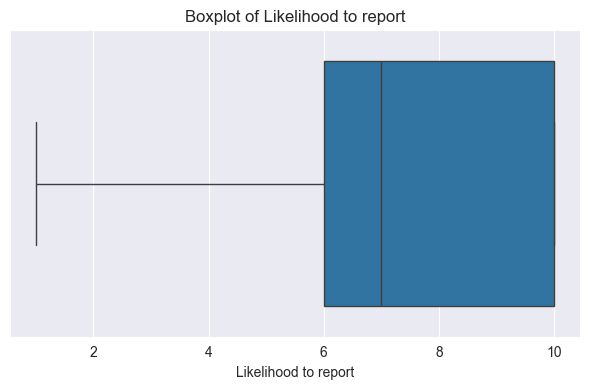

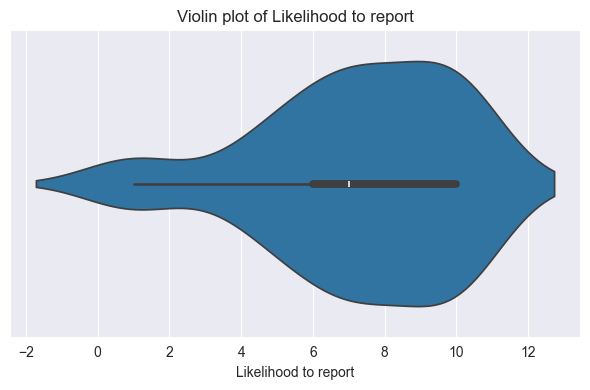

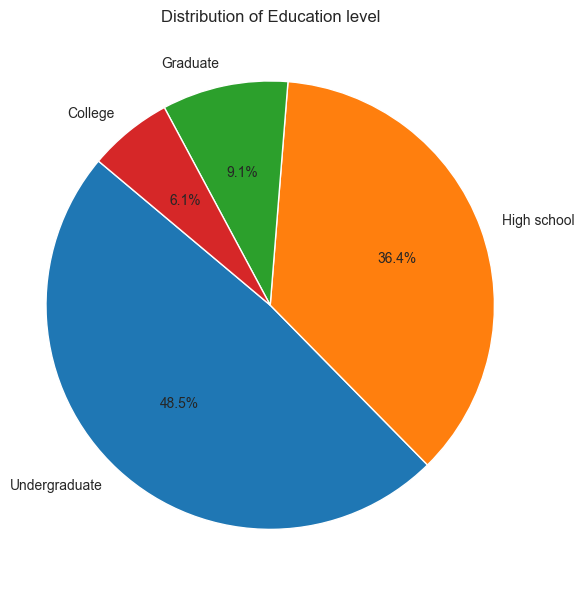

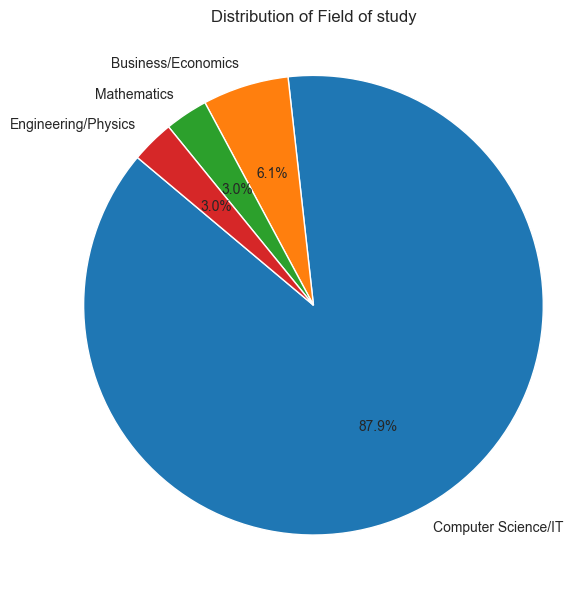

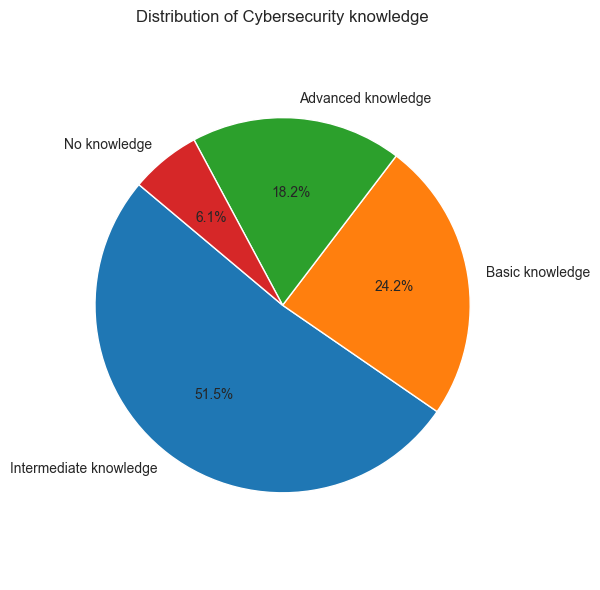

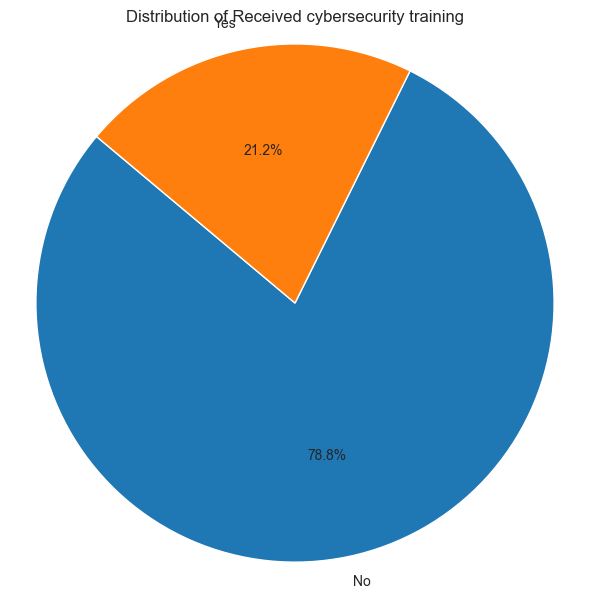

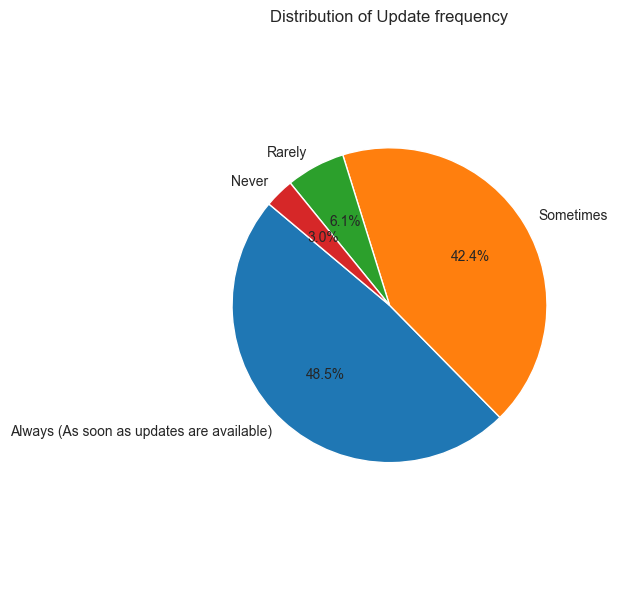

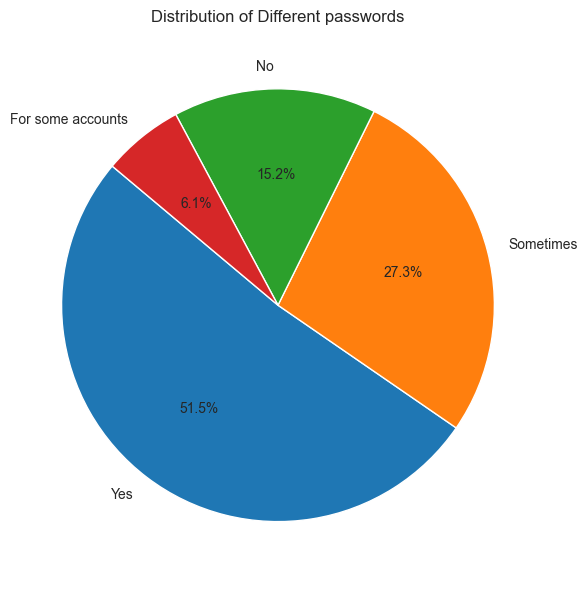

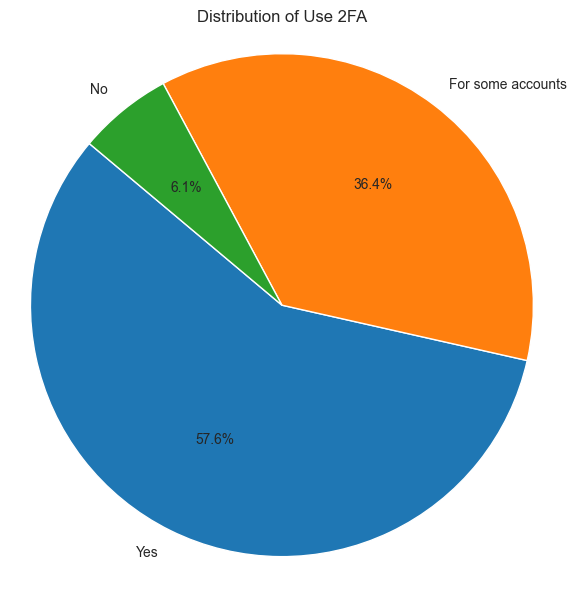

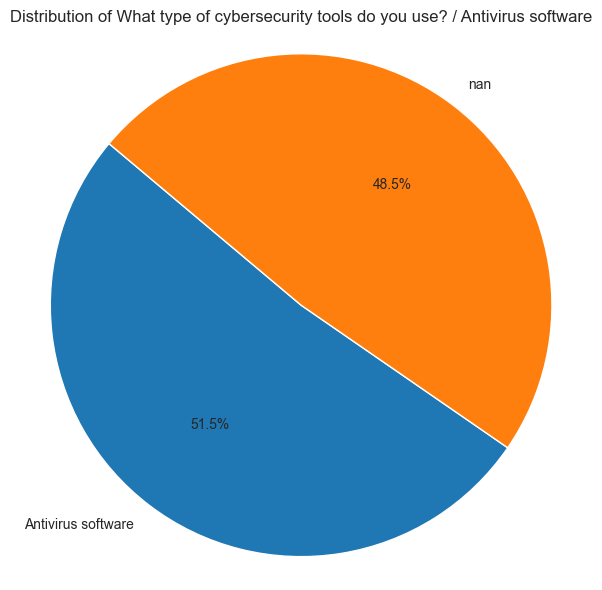

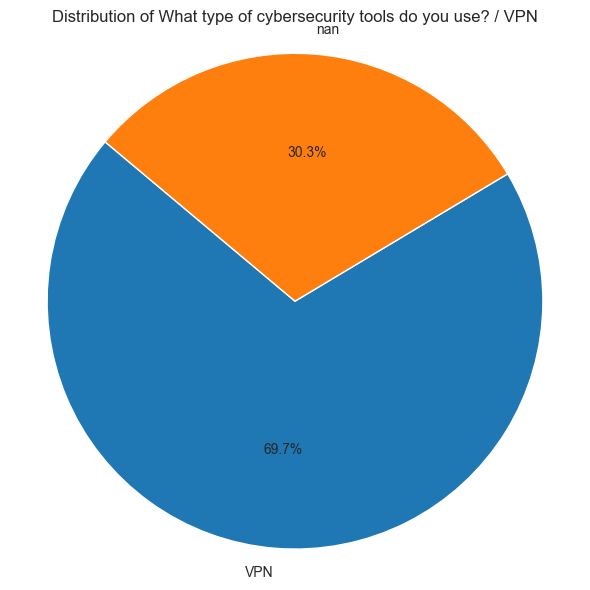

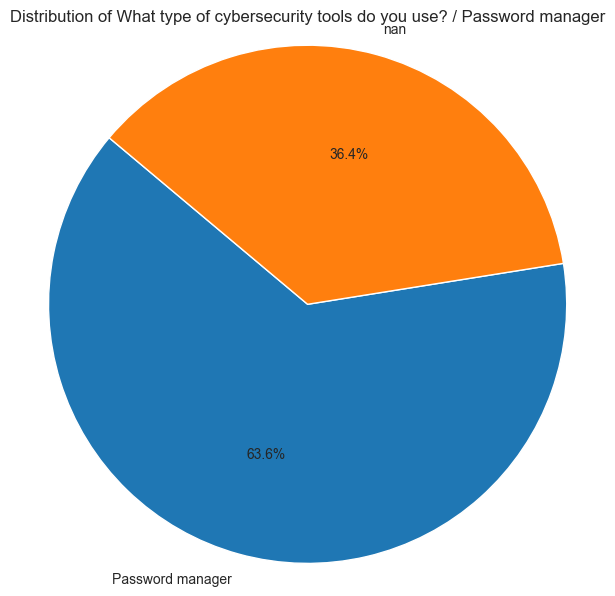

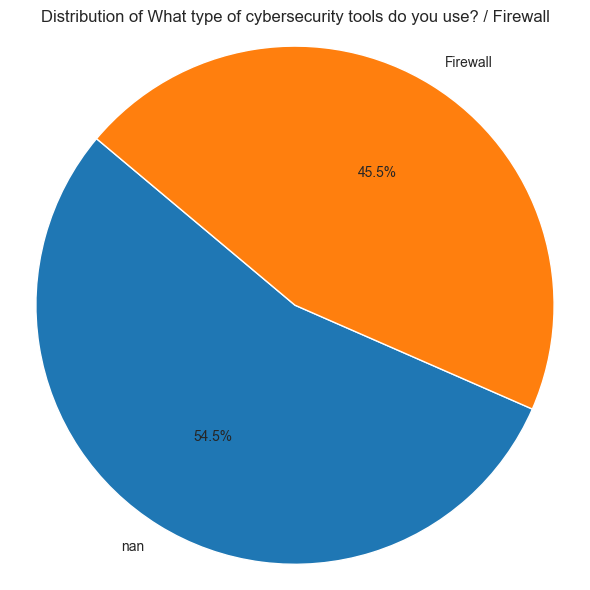

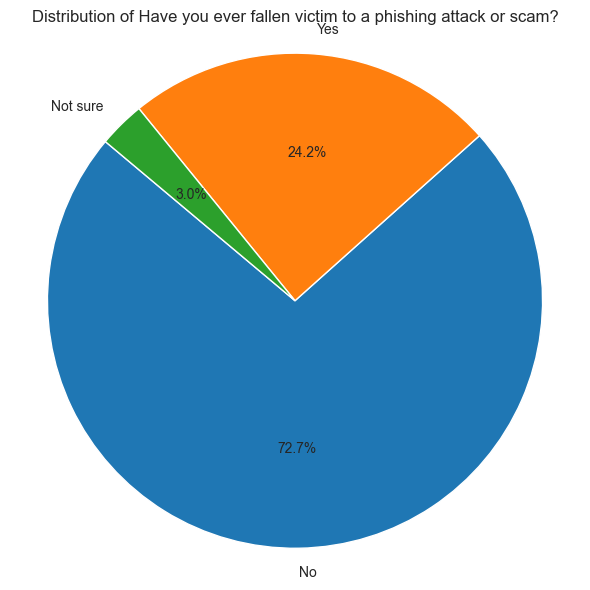

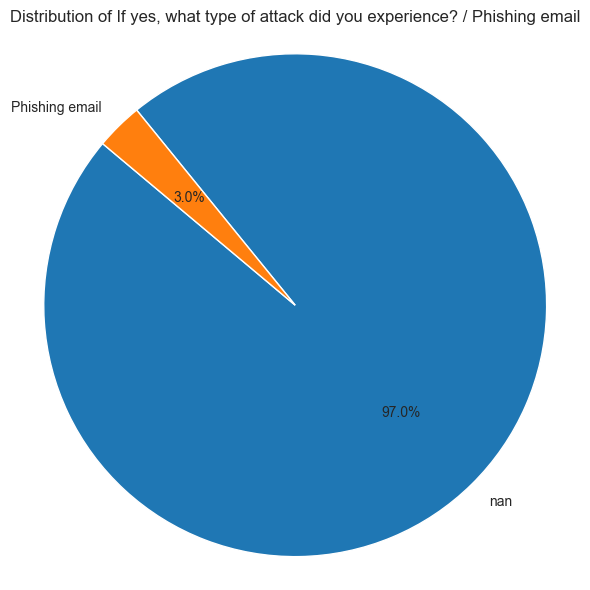

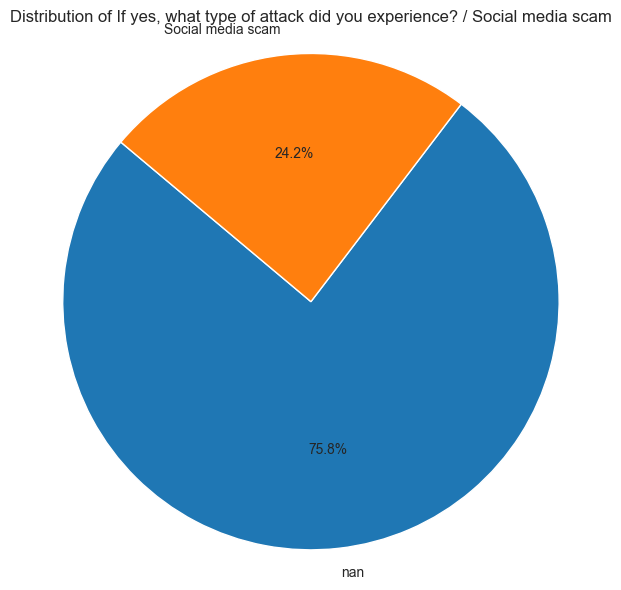

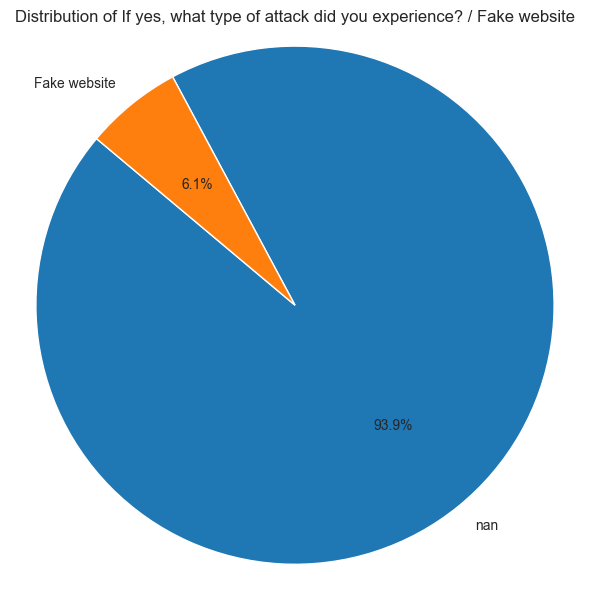

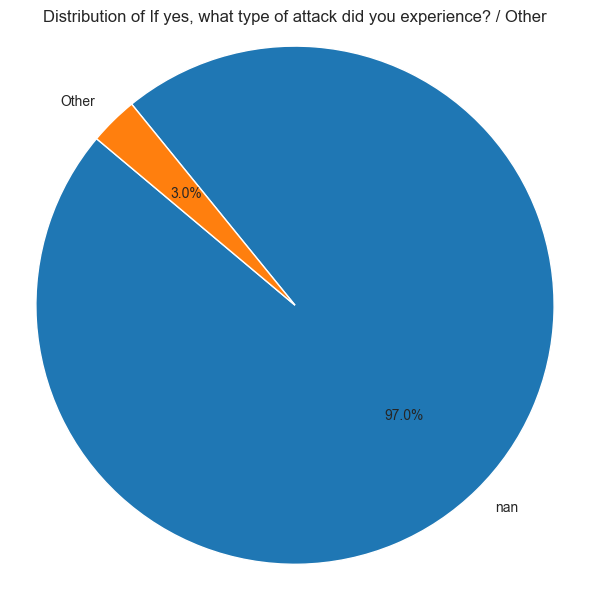

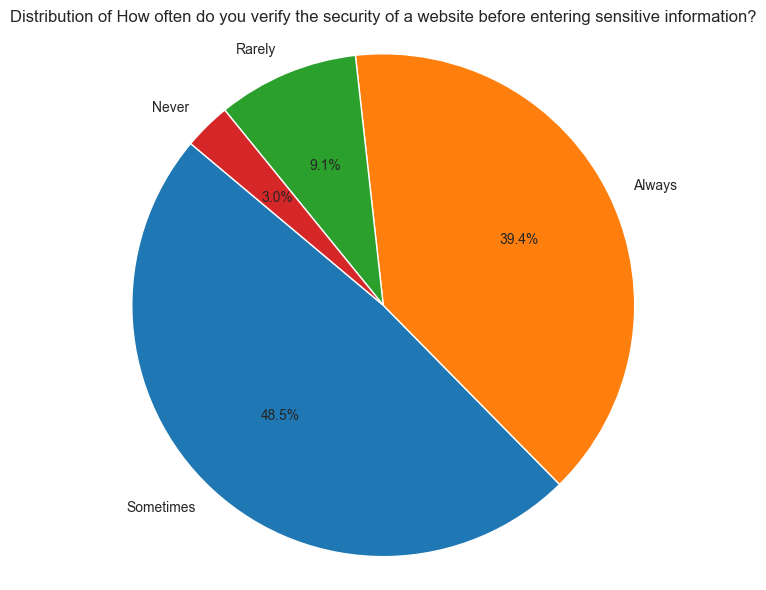

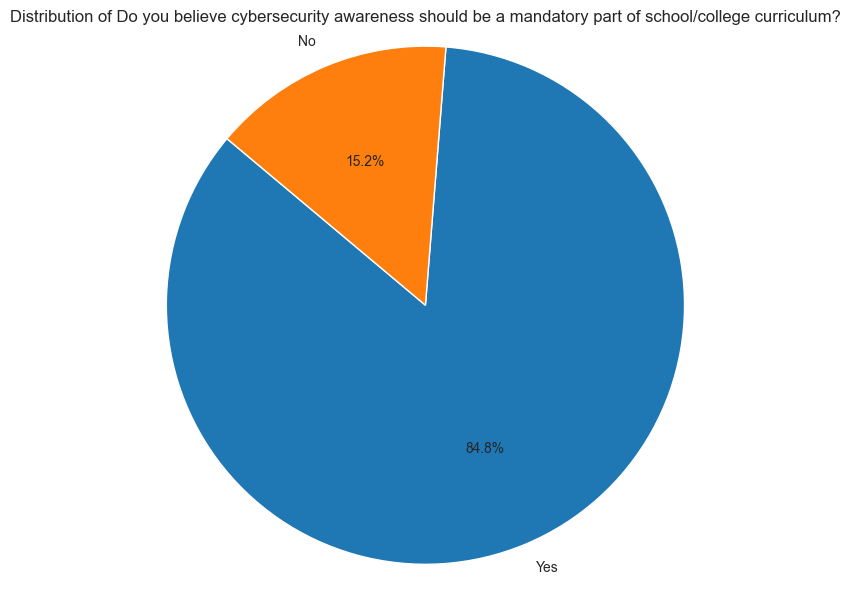

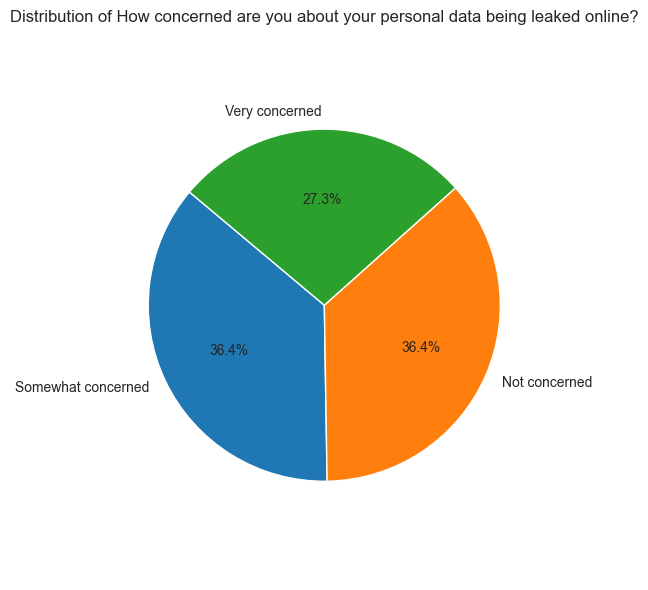

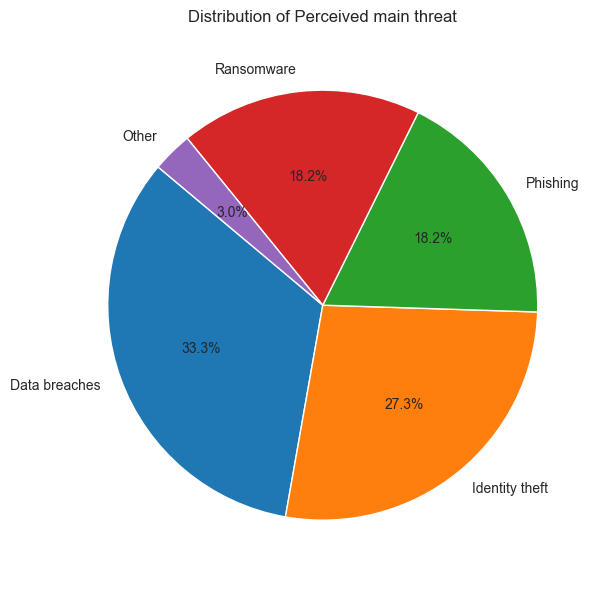

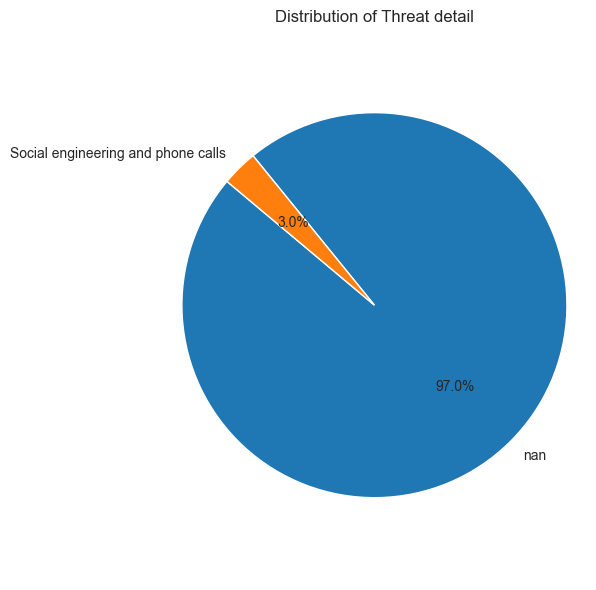

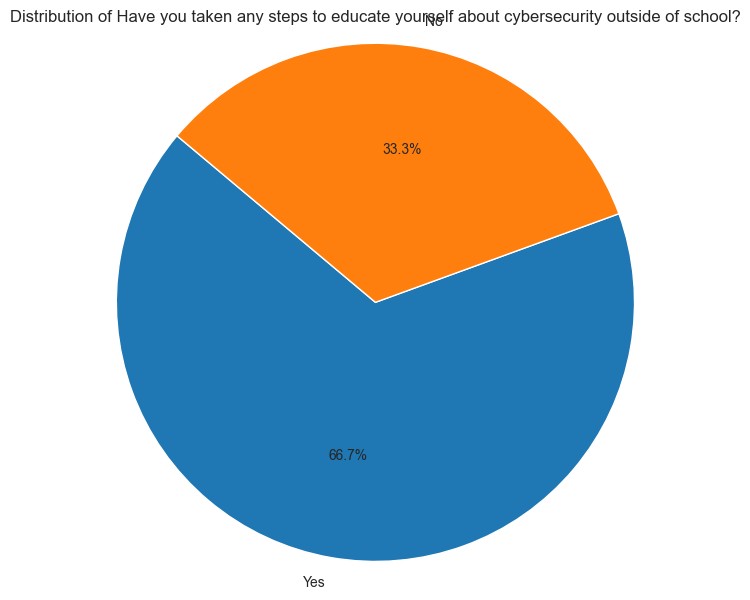

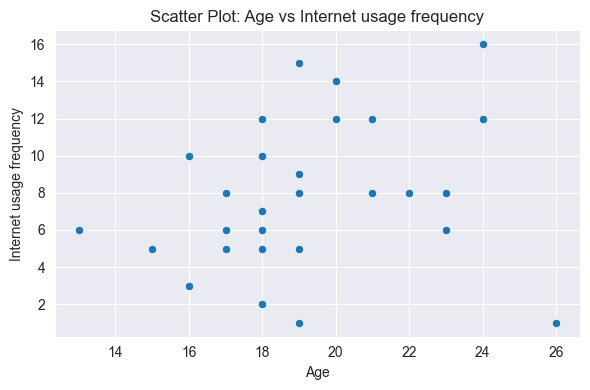

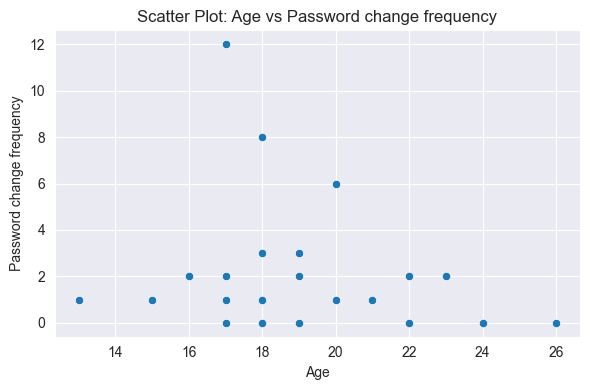

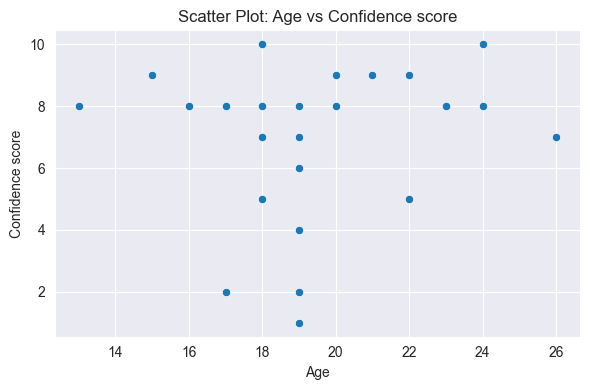

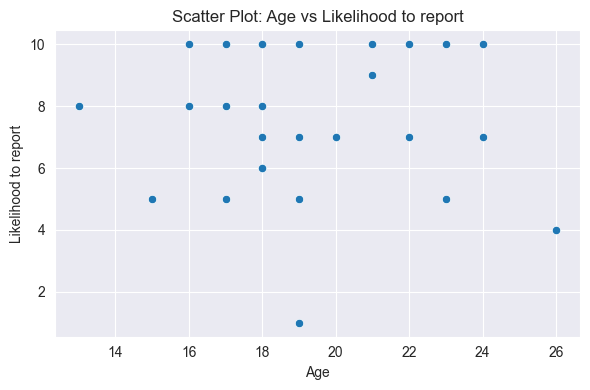

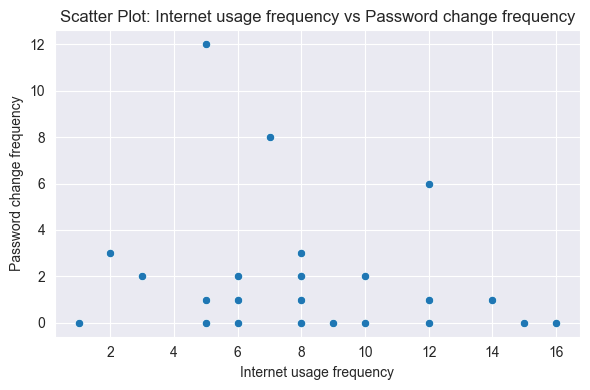

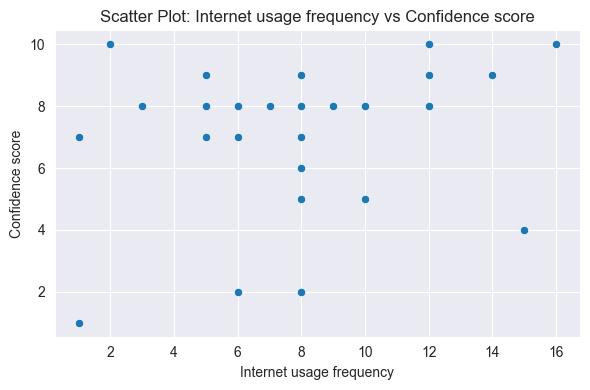

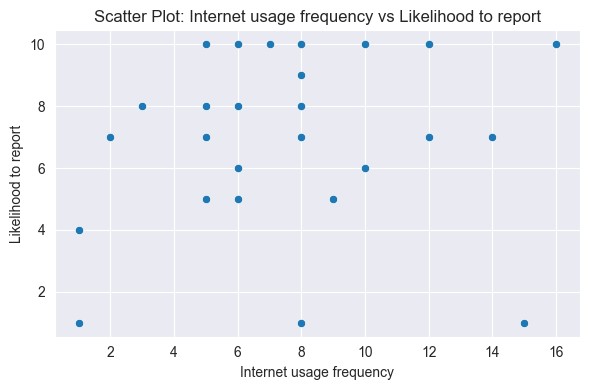

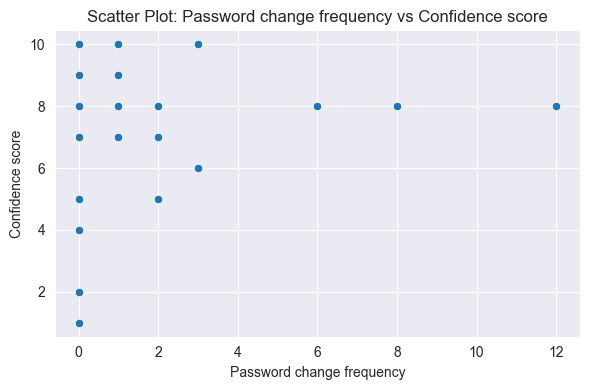

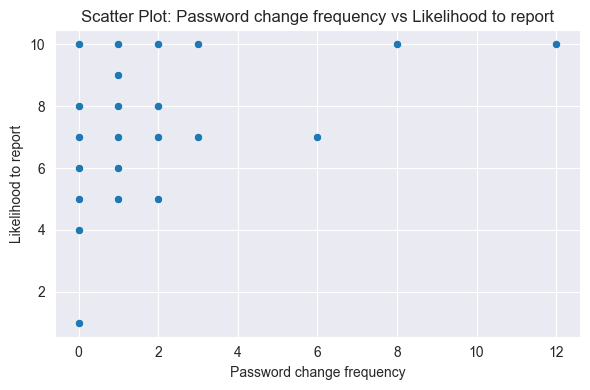

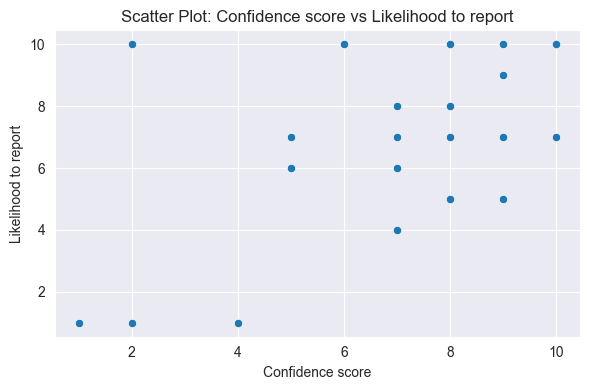

In [114]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, f_oneway, kruskal, pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


shapiro_results = {}
for col in data.select_dtypes(include=[np.number]).columns:
    if len(data[col].unique()) > 2: 
        stat, p = shapiro(data[col])
        shapiro_results[col] = {"W-stat": stat, "p-value": p}


for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

    if data[col].nunique() > 1:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.violinplot(x=data[col])
        plt.title(f"Violin plot of {col}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipped {col}: not enough variability for box/violin plot.")
    
import matplotlib.pyplot as plt

categorical_cols = data.select_dtypes(exclude=[np.number]).columns

for col in categorical_cols:
    counts = data[col].value_counts(dropna=False)
    if counts.shape[0] <= 20: 
        plt.figure(figsize=(6, 6))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

numerical_cols = data.select_dtypes(include=[np.number]).columns

for i, col1 in enumerate(numerical_cols):
    for col2 in numerical_cols[i+1:]:
        if col1 != col2 and data[col1].nunique() > 1 and data[col2].nunique() > 1:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=data[col1], y=data[col2])
            plt.title(f"Scatter Plot: {col1} vs {col2}")
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.tight_layout()
            plt.show()


In [115]:
data

,Age,Education level,Field of study,Internet usage frequency,Cybersecurity knowledge,Received cybersecurity training,Update frequency,Different passwords,Password change frequency,Use 2FA,...,"If yes, what type of attack did you experience? / Fake website","If yes, what type of attack did you experience? / Other",Confidence score,How often do you verify the security of a website before entering sensitive information?,Do you believe cybersecurity awareness should be a mandatory part of school/college curriculum?,How concerned are you about your personal data being leaked online?,Perceived main threat,Threat detail,Have you taken any steps to educate yourself about cybersecurity outside of school?,Likelihood to report
0,23,Graduate,Computer Science/IT,6,Intermediate knowledge,Yes,Always (As soon as updates are available),Sometimes,2,Yes,...,NaN,NaN,8,Always,No,Somewhat concerned,Data breaches,NaN,Yes,5
1,26,Undergraduate,Computer Science/IT,1,Intermediate knowledge,No,Always (As soon as updates are available),Sometimes,0,Yes,...,NaN,NaN,7,Rarely,Yes,Very concerned,Identity theft,NaN,No,4
2,18,Undergraduate,Business/Economics,10,Basic knowledge,No,Rarely,No,0,For some accounts,...,NaN,NaN,5,Rarely,Yes,Somewhat concerned,Identity theft,NaN,No,6
3,19,Undergraduate,Computer Science/IT,8,Basic knowledge,No,Always (As soon as updates are available),Yes,3,For some accounts,...,NaN,NaN,6,Sometimes,Yes,Very concerned,Identity theft,NaN,Yes,10
4,19,High school,Computer Science/IT,5,Basic knowledge,No,Always (As soon as updates are available),Sometimes,0,For some accounts,...,NaN,NaN,8,Sometimes,Yes,Somewhat concerned,Identity theft,NaN,No,7
5,21,High school,Computer Science/IT,12,Advanced knowledge,No,Always (As soon as updates are available),Yes,1,For some accounts,...,NaN,NaN,9,Always,Yes,Very concerned,Phishing,NaN,No,10
6,17,High school,Business/Economics,6,No knowledge,No,Sometimes,Yes,0,No,...,NaN,NaN,2,Sometimes,Yes,Very concerned,Identity theft,NaN,Yes,10
7,21,Undergraduate,Computer Science/IT,8,Advanced knowledge,Yes,Always (As soon as updates are available),Yes,1,Yes,...,NaN,NaN,9,Always,Yes,Very concerned,Phishing,NaN,Yes,9
9,15,High school,Computer Science/IT,5,Intermediate knowledge,No,Always (As soon as updates are available),Sometimes,1,Yes,...,NaN,NaN,9,Sometimes,Yes,Not concerned,Data breaches,NaN,Yes,5
10,19,Undergraduate,Mathematics,1,No knowledge,No,Never,No,0,No,...,NaN,NaN,1,Never,No,Not concerned,Ransomware,NaN,No,1


In [116]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 35
Data columns (total 28 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Age                                                                                              33 non-null     int64  
 1   Education level                                                                                  33 non-null     object 
 2   Field of study                                                                                   33 non-null     object 
 3   Internet usage frequency                                                                         33 non-null     int64  
 4   Cybersecurity knowledge                                                                          33 non-null     object 
 5   Received cybers

In [117]:
data["Have you taken any steps to educate yourself about cybersecurity outside of school?"].value_counts(normalize=True).mul(100).round(2)

Have you taken any steps to educate yourself about cybersecurity outside of school?
Yes    66.67
No     33.33
Name: proportion, dtype: float64

In [118]:
correlation_matrix = data[["Age", "Likelihood to report", "Confidence score", "Password change frequency", "Internet usage frequency"]].corr()
correlation_matrix

,Age,Likelihood to report,Confidence score,Password change frequency,Internet usage frequency
Age,1.000000,-0.050747,0.063069,-0.188528,0.208507
Likelihood to report,-0.050747,1.000000,0.562116,0.334682,0.216563
Confidence score,0.063069,0.562116,1.000000,0.190352,0.233259
Password change frequency,-0.188528,0.334682,0.190352,1.000000,-0.116267
Internet usage frequency,0.208507,0.216563,0.233259,-0.116267,1.000000


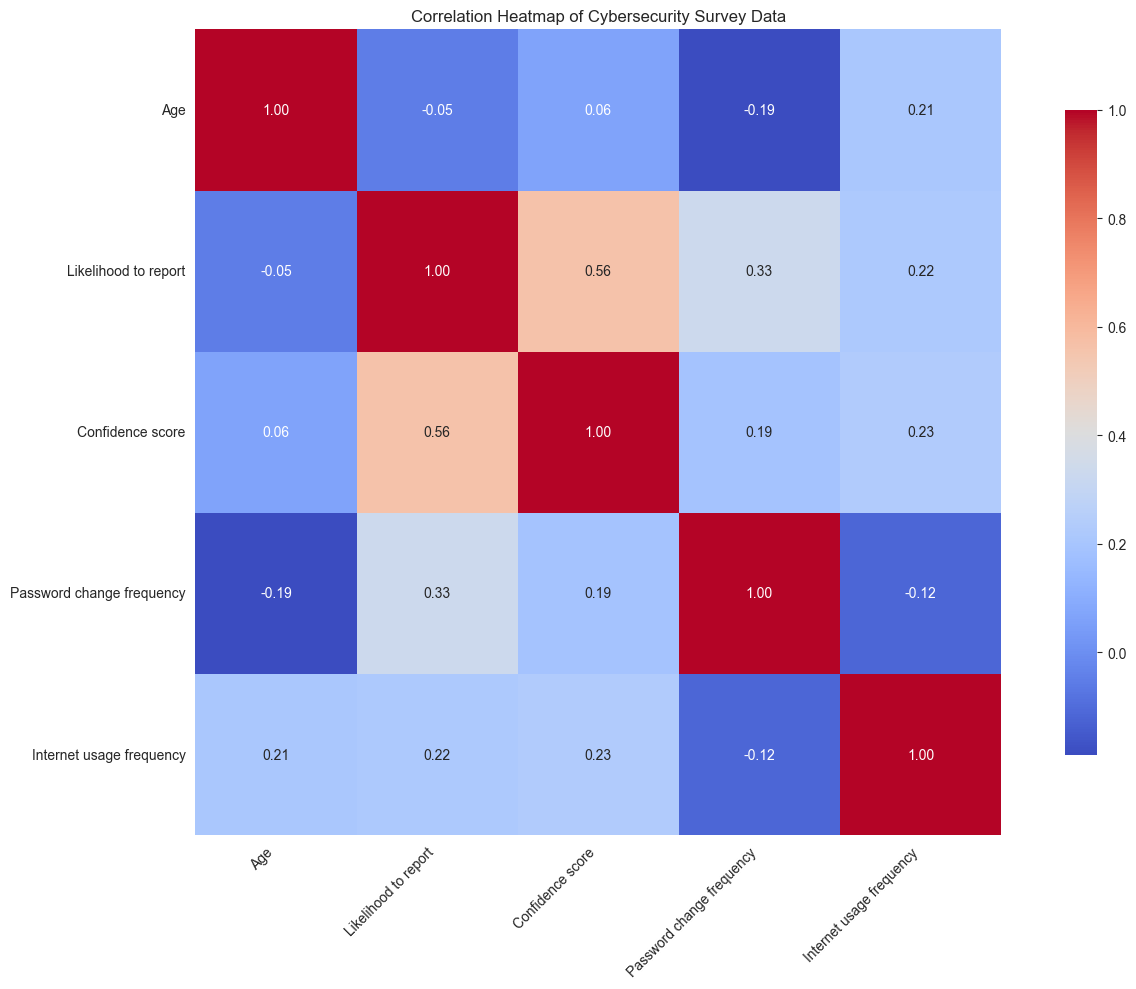

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Cybersecurity Survey Data")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from itertools import combinations
import warnings

In [121]:
data.info()

data

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 35
Data columns (total 28 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Age                                                                                              33 non-null     int64  
 1   Education level                                                                                  33 non-null     object 
 2   Field of study                                                                                   33 non-null     object 
 3   Internet usage frequency                                                                         33 non-null     int64  
 4   Cybersecurity knowledge                                                                          33 non-null     object 
 5   Received cybers

,Age,Education level,Field of study,Internet usage frequency,Cybersecurity knowledge,Received cybersecurity training,Update frequency,Different passwords,Password change frequency,Use 2FA,...,"If yes, what type of attack did you experience? / Fake website","If yes, what type of attack did you experience? / Other",Confidence score,How often do you verify the security of a website before entering sensitive information?,Do you believe cybersecurity awareness should be a mandatory part of school/college curriculum?,How concerned are you about your personal data being leaked online?,Perceived main threat,Threat detail,Have you taken any steps to educate yourself about cybersecurity outside of school?,Likelihood to report
0,23,Graduate,Computer Science/IT,6,Intermediate knowledge,Yes,Always (As soon as updates are available),Sometimes,2,Yes,...,NaN,NaN,8,Always,No,Somewhat concerned,Data breaches,NaN,Yes,5
1,26,Undergraduate,Computer Science/IT,1,Intermediate knowledge,No,Always (As soon as updates are available),Sometimes,0,Yes,...,NaN,NaN,7,Rarely,Yes,Very concerned,Identity theft,NaN,No,4
2,18,Undergraduate,Business/Economics,10,Basic knowledge,No,Rarely,No,0,For some accounts,...,NaN,NaN,5,Rarely,Yes,Somewhat concerned,Identity theft,NaN,No,6
3,19,Undergraduate,Computer Science/IT,8,Basic knowledge,No,Always (As soon as updates are available),Yes,3,For some accounts,...,NaN,NaN,6,Sometimes,Yes,Very concerned,Identity theft,NaN,Yes,10
4,19,High school,Computer Science/IT,5,Basic knowledge,No,Always (As soon as updates are available),Sometimes,0,For some accounts,...,NaN,NaN,8,Sometimes,Yes,Somewhat concerned,Identity theft,NaN,No,7
5,21,High school,Computer Science/IT,12,Advanced knowledge,No,Always (As soon as updates are available),Yes,1,For some accounts,...,NaN,NaN,9,Always,Yes,Very concerned,Phishing,NaN,No,10
6,17,High school,Business/Economics,6,No knowledge,No,Sometimes,Yes,0,No,...,NaN,NaN,2,Sometimes,Yes,Very concerned,Identity theft,NaN,Yes,10
7,21,Undergraduate,Computer Science/IT,8,Advanced knowledge,Yes,Always (As soon as updates are available),Yes,1,Yes,...,NaN,NaN,9,Always,Yes,Very concerned,Phishing,NaN,Yes,9
9,15,High school,Computer Science/IT,5,Intermediate knowledge,No,Always (As soon as updates are available),Sometimes,1,Yes,...,NaN,NaN,9,Sometimes,Yes,Not concerned,Data breaches,NaN,Yes,5
10,19,Undergraduate,Mathematics,1,No knowledge,No,Never,No,0,No,...,NaN,NaN,1,Never,No,Not concerned,Ransomware,NaN,No,1


In [122]:
import pandas as pd
import numpy as np
import scipy.stats as st
from itertools import combinations

num_cols = ["Age", "Likelihood to report", "Confidence score", "Password change frequency", "Internet usage frequency"]
cat_cols = [col for col in data.columns if col not in num_cols]

def my_cramers(x, y):
    contab = pd.crosstab(x, y)
    chi2, _, _, _ = st.chi2_contingency(contab)
    return np.sqrt(chi2 / (len(x) * (min(contab.shape) - 1)))

def is_normal(series):
    series = series.dropna()
    if len(series) > 500:
        series = series.sample(500, random_state=42)
    p_value = st.shapiro(series)[1]
    return p_value > 0.05

results = []

In [123]:
import pandas as pd
import numpy as np
import scipy.stats as st
from itertools import combinations

def rank_biserial(u, n1, n2):
    return 1 - (2 * u) / (n1 * n2)

def eta_squared_from_f(f_val, k, n):
    return (f_val * (k - 1)) / (f_val * (k - 1) + (n - k))

def epsilon_squared(H, n, k):
    return H * (n + 1) / (n**2 - 1)

def is_normal(series):
    series = series.dropna()
    if len(series) > 500:
        series = series.sample(500, random_state=42)
    return st.shapiro(series)[1] > 0.05

def my_cramers(x, y):
    contab = pd.crosstab(x, y)
    chi2, _, _, _ = st.chi2_contingency(contab)
    return np.sqrt(chi2 / (len(x) * (min(contab.shape) - 1)))

results = []
posthoc_results = []

for col1, col2 in combinations(data.columns, 2):
    if col1 == col2:
        continue

    df_pair = data[[col1, col2]].dropna()
    if len(df_pair) < 30:
        continue

    x, y = df_pair[col1], df_pair[col2]

    if col1 in num_cols and col2 in num_cols:
        if is_normal(x) and is_normal(y):
            stat, pval = st.pearsonr(x, y)
            method = 'Pearson'
        else:
            stat, pval = st.spearmanr(x, y)
            method = 'Spearman'
        results.append((col1, col2, method, stat, round(pval, 5)))

    elif col1 in cat_cols and col2 in cat_cols:
        cramers = my_cramers(x, y)
        chi2, pval, _, _ = st.chi2_contingency(pd.crosstab(x, y))
        results.append((col1, col2, 'Chi2 + CramerV', cramers, round(pval, 5)))

    elif (col1 in num_cols and col2 in cat_cols) or (col1 in cat_cols and col2 in num_cols):
        num_var = x if col1 in num_cols else y
        cat_var = y if col1 in num_cols else x

        groups = [num_var[cat_var == g] for g in cat_var.unique() if len(num_var[cat_var == g]) >= 10]
        if len(groups) < 2:
            continue

        group_labels = cat_var.unique()
        unique_groups = cat_var.nunique()

        if unique_groups == 2:
            if all(is_normal(g) for g in groups):
                stat, pval = st.ttest_ind(groups[0], groups[1], equal_var=False)
                method = 'T-test'
                effect = stat
            else:
                if set(cat_var.unique()) == {"Yes", "No"}:
                    yes_group = num_var[cat_var == "Yes"]
                    no_group = num_var[cat_var == "No"]
                
                    if len(yes_group) >= 10 and len(no_group) >= 10:
                        stat, pval = st.mannwhitneyu(yes_group, no_group, alternative='greater')
                        n1, n2 = len(yes_group), len(no_group)
                        effect = rank_biserial(stat, n1, n2)
                        method = 'Mann-Whitney (Yes > No)'
                    else:
                        continue
                else:
                    stat, pval = st.mannwhitneyu(groups[0], groups[1])
                    n1, n2 = len(groups[0]), len(groups[1])
                    effect = rank_biserial(stat, n1, n2)
                    method = 'Mann-Whitney'
                
            results.append((col1, col2, method, effect, round(pval, 5)))

        elif unique_groups > 2:
            if all(is_normal(g) for g in groups):
                stat, pval = st.f_oneway(*groups)
                method = 'ANOVA'
                n = sum(len(g) for g in groups)
                k = len(groups)
                eta_sq = eta_squared_from_f(stat, k, n)
                effect = np.clip(eta_sq, -1, 1)  
            else:
                stat, pval = st.kruskal(*groups)
                method = 'Kruskal-Wallis'
                n = sum(len(g) for g in groups)
                k = len(groups)
                effect = epsilon_squared(stat, n, k)
            results.append((col1, col2, method, effect, round(pval, 5)))

            if pval < 0.05:
                group_names = cat_var.unique()
                comparisons = list(combinations(group_names, 2))
                alpha = 0.05
                corrected_alpha = alpha / len(comparisons)

                for g1, g2 in comparisons:
                    g1_vals = num_var[cat_var == g1]
                    g2_vals = num_var[cat_var == g2]
                    if len(g1_vals) >= 10 and len(g2_vals) >= 10:
                        u_stat, p_pair = st.mannwhitneyu(g1_vals, g2_vals)
                        effect_size = rank_biserial(u_stat, len(g1_vals), len(g2_vals))
                        posthoc_results.append({
                            'Feature 1': col1,
                            'Feature 2': col2,
                            'Group 1': g1,
                            'Group 2': g2,
                            'Test': 'Mann-Whitney posthoc',
                            'Statistic': effect_size,
                            'P-value': p_pair,
                            'P-value adj': min(p_pair * len(comparisons), 1.0),
                            'Significant': p_pair < corrected_alpha
                        })


results_df = pd.DataFrame(results, columns=['Feature 1', 'Feature 2', 'Test', 'Statistic', 'P-value'])
results_df_p = results_df[results_df['P-value'] < 0.05]

posthoc_df = pd.DataFrame(posthoc_results) if posthoc_results else None

results_df_p

,Feature 1,Feature 2,Test,Statistic,P-value
18,Education level,Have you ever fallen victim to a phishing atta...,Chi2 + CramerV,0.491243,0.01415
19,Education level,Confidence score,Kruskal-Wallis,0.273643,0.00656
25,Education level,Likelihood to report,Kruskal-Wallis,0.173462,0.03045
26,Field of study,Cybersecurity knowledge,Chi2 + CramerV,0.543377,0.00059
28,Field of study,Update frequency,Chi2 + CramerV,0.653398,0.00000
30,Field of study,Use 2FA,Chi2 + CramerV,0.639347,0.00015
32,Field of study,How often do you verify the security of a webs...,Chi2 + CramerV,0.626387,0.00001
37,Internet usage frequency,Update frequency,ANOVA,0.135637,0.04523
46,Cybersecurity knowledge,Update frequency,Chi2 + CramerV,0.489003,0.00485
48,Cybersecurity knowledge,Use 2FA,Chi2 + CramerV,0.736174,0.00000


In [124]:
posthoc_df

,Feature 1,Feature 2,Group 1,Group 2,Test,Statistic,P-value,P-value adj,Significant
0,Education level,Confidence score,Undergraduate,High school,Mann-Whitney posthoc,0.593750,0.007053,0.042321,True
1,Education level,Likelihood to report,Undergraduate,High school,Mann-Whitney posthoc,0.473958,0.032326,0.193957,False
2,Internet usage frequency,Update frequency,Always (As soon as updates are available),Sometimes,Mann-Whitney posthoc,0.370536,0.083562,0.501375,False
3,Use 2FA,Confidence score,Yes,For some accounts,Mann-Whitney posthoc,-0.517544,0.013297,0.039891,True


Moderate positive effect (Undergraduates > High school)

!Suggests partial 2FA users had higher Confidence scores than consistent users — might be worth reviewing this variable more carefully.

In [125]:
results_df

,Feature 1,Feature 2,Test,Statistic,P-value
0,Age,Education level,Kruskal-Wallis,0.141499,0.05063
1,Age,Internet usage frequency,Pearson,0.208507,0.24424
2,Age,Update frequency,ANOVA,0.000289,0.92897
3,Age,Password change frequency,Spearman,-0.232851,0.19221
4,Age,Use 2FA,ANOVA,0.005302,0.69708
...,...,...,...,...,...
113,How concerned are you about your personal data...,Perceived main threat,Chi2 + CramerV,0.389340,0.26470
114,How concerned are you about your personal data...,Have you taken any steps to educate yourself a...,Chi2 + CramerV,0.162835,0.64565
115,How concerned are you about your personal data...,Likelihood to report,ANOVA,0.133829,0.07874
116,Perceived main threat,Have you taken any steps to educate yourself a...,Chi2 + CramerV,0.322482,0.48832


C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


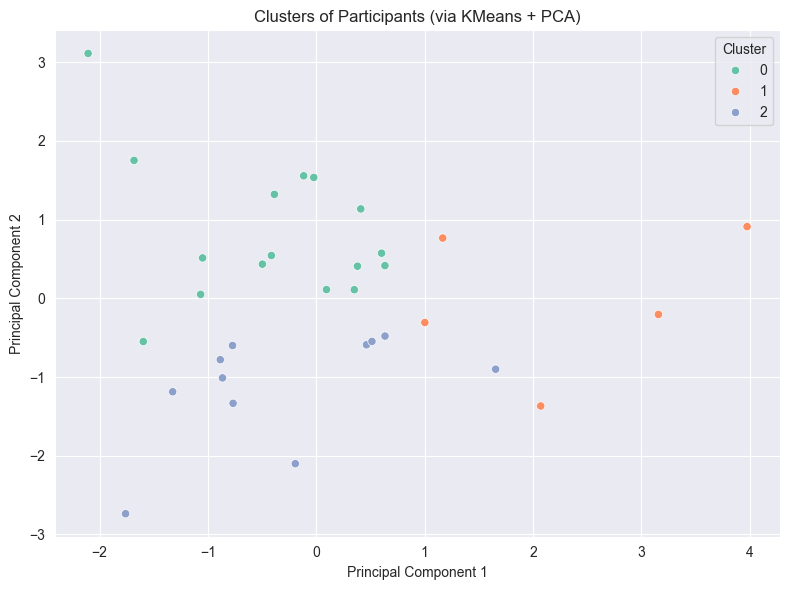

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

features = data.select_dtypes(include=[np.number])

features = features.dropna(axis=1, thresh=int(0.9 * len(features)))
features = features.fillna(features.median())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

data['Cluster'] = clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Clusters of Participants (via KMeans + PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
